In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [327]:
TR = 50
T1 = 1000
T2_star = 50
res = 100
t_pulse = 15
t = np.arange(0, 2000 ,0.01)

In [328]:
def flip(t, t_pulse, TR):
    x = np.empty(t.shape)
    for idx, tt in enumerate(t):
        if tt % TR < t_pulse:
            x[idx] = np.sin(2 * np.pi * (1/(2*t_pulse)) * (tt % TR))
        else:
            x[idx] = 0
            
    return x

def Mz_Mxy(t, t_pulse, alpha, TR, T1, T2_star):
    Mz = np.empty(t.shape)
    Mxy = np.empty(t.shape)
    temp = 1
    M0 = 0
    for idx, tt in enumerate(t):
        if tt == 0:
            Mz[idx] = temp
            Mxy[idx] = M0
            
        elif tt % TR == 0:
            Mz[idx] = temp = Mz[idx-1]
            Mxy[idx] = Mxy[idx-1]
            
        elif tt % TR < (t_pulse * alpha / 180):
            Mz[idx] = temp * np.cos(2 * np.pi * (1/(t_pulse*2)) * (tt % TR))
            M0 = Mxy[idx] = temp * np.sin(2 * np.pi * (1/(t_pulse*2)) * (tt % TR))
            
        else:
            tmp = temp * np.cos(alpha * np.pi / 180)
            Mz[idx] = (1 - tmp) * (1 - np.exp(-(tt % TR - (t_pulse * alpha / 180) )/T1)) + tmp
            Mxy[idx] = M0 * np.exp(-(tt % TR  - (t_pulse * alpha / 180) )/T2_star)
    
    return Mz, Mxy

In [329]:
# def Mz_Mxy(t, alpha, TR, T1, T2_star):
#     Mz = np.empty(t.shape)
#     Mxy = np.empty(t.shape)
#     temp = 0
#     M0 = 1
#     for idx, tt in enumerate(t):
#         if tt == 0:
#             Mz[idx] = temp = np.cos(alpha * np.pi / 180)
#             M0 = Mxy[idx] = np.sin(alpha * np.pi / 180)
#         elif tt % TR == 0:
#             Mz[idx] = temp =  Mz[idx-1] * np.cos(alpha * np.pi / 180)
#             M0 = Mxy[idx] = Mz[idx-1] * np.sin(alpha * np.pi / 180)
#         else:
#             Mz[idx] = (1 - temp) * (1 - np.exp(-(tt % TR)/T1)) + temp
#             Mxy[idx] = M0 * np.exp(-(tt % TR)/T2_star)
            
#     return Mz, Mxy

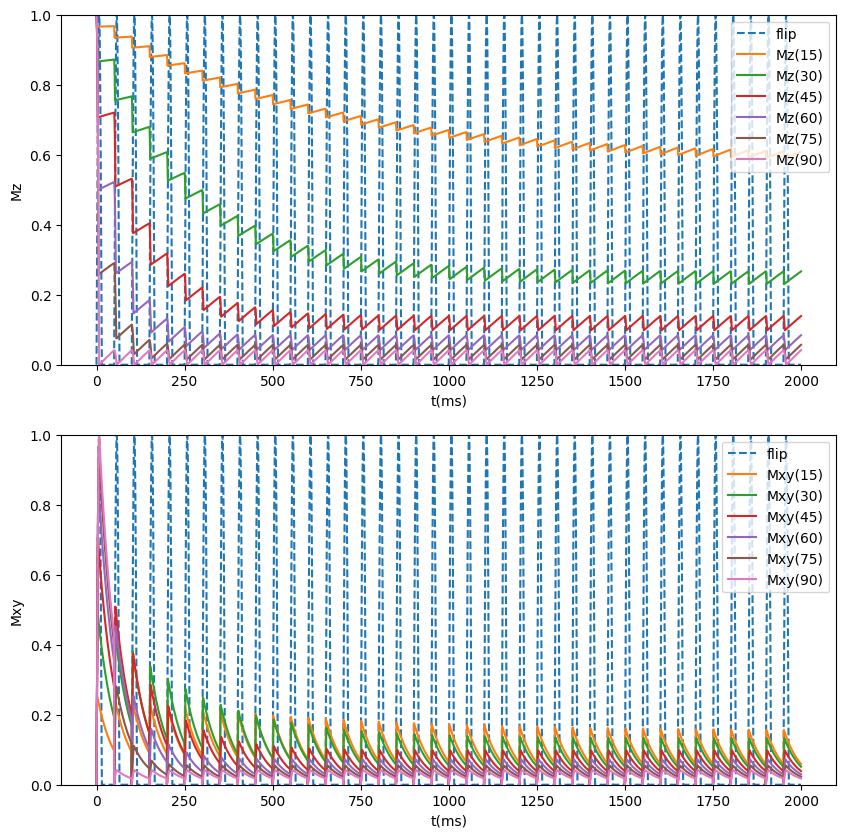

In [330]:
x = flip(t, t_pulse, TR)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(t, x, label=f"flip", linestyle='--')
ax[1].plot(t, x, label=f"flip", linestyle='--')
for i in range(15, 91, 15):
    Mz, Mxy = Mz_Mxy(t, t_pulse, i, TR, T1, T2_star)
    ax[0].plot(t, Mz, label=f"Mz({i})")
    ax[1].plot(t, Mxy, label=f"Mxy({i})")
    
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[0].set_xlabel('t(ms)')
ax[1].set_xlabel('t(ms)')
ax[0].set_ylabel('Mz')
ax[1].set_ylabel('Mxy')
plt.savefig('problem1.svg')
plt.savefig('problem1.png')
plt.show()